In [2]:
from src.utils.Study import Study
from src.utils.ProjectConfiguration import ProjectConfiguration
from src.utils.BaselineConfigs import EXP_OctreeNCA
from src.datasets.Dataset_BCSS_Seg import Dataset_BCSS_Seg
from src.datasets.Dataset_AGGC import Dataset_AGGC
import octree_vis, torch, os, json, openslide, math
import einops
from src.models.Model_OctreeNCAV2 import OctreeNCAV2
import numpy as np
import torch.nn.functional as F
from src.utils.ProjectConfiguration import ProjectConfiguration as pc
from src.models.Model_OctreeNCA_2d_patching2 import OctreeNCA2DPatch2
import matplotlib.pyplot as plt

from src.datasets.Nii_Gz_Dataset_3D import Dataset_NiiGz_3D
from src.utils.BaselineConfigs import EXP_OctreeNCA3D
from src.models.Model_OctreeNCA_3d_patching2 import OctreeNCA3DPatch2


torch.set_grad_enabled(False)

/home/nlemke/remote/miniconda3/envs/nca3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/nlemke/remote/miniconda3/envs/nca3/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
model_path = "/local/scratch/clmn1/octree_study_new/Experiments/prostate_OctreeNCASegmentation"
with open(os.path.join(model_path, "config.json")) as f:
    config = json.load(f) 

config["trainer.losses.parameters"] = [{}]

exp = EXP_OctreeNCA3D().createExperiment(config, detail_config={}, dataset_class=Dataset_NiiGz_3D, dataset_args={})

model: OctreeNCA3DPatch2 = exp.model
assert isinstance(model, OctreeNCA3DPatch2)
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '/local/scratch/clmn1/octree_study/Experiments/Prostate49_redone_OctreeNCA3D/config.json'

In [65]:
from src.datasets.BatchgeneratorsDataLoader import my_default_collate


#batch = [exp.datasets["test"][0], exp.datasets["test"][1]]
batch = [exp.datasets["test"][5], exp.datasets["test"][1], exp.datasets["test"][0]]


batch = my_default_collate(batch)
image = einops.rearrange(batch["image"], "b h w d -> b h w d 1")
image = torch.from_numpy(image)

In [66]:
pred = model(image)
pred["logits"].shape

torch.Size([3, 320, 320, 24, 1])

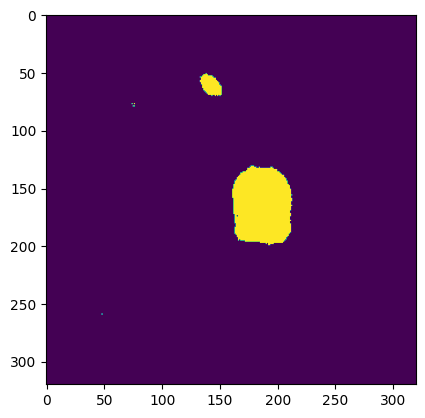

In [72]:
slice = pred["logits"][0, :, :, 12, 0].cpu().numpy()
plt.imshow(slice > 0)